# <span style="color : red"> **Comprehensive Assessment : Machine Learning**</span>

### **Objective**
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

## <span style="color : green" > Loading the dataset </span>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### **Exploratory Data Analysis**

In [3]:
df.shape

(205, 26)

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Distribution of Data

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [6]:
df.describe(include="object").T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
 # finding duplicates
 df.duplicated().sum()

0

### **Histplot to find the distribution and skewness of different columns**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

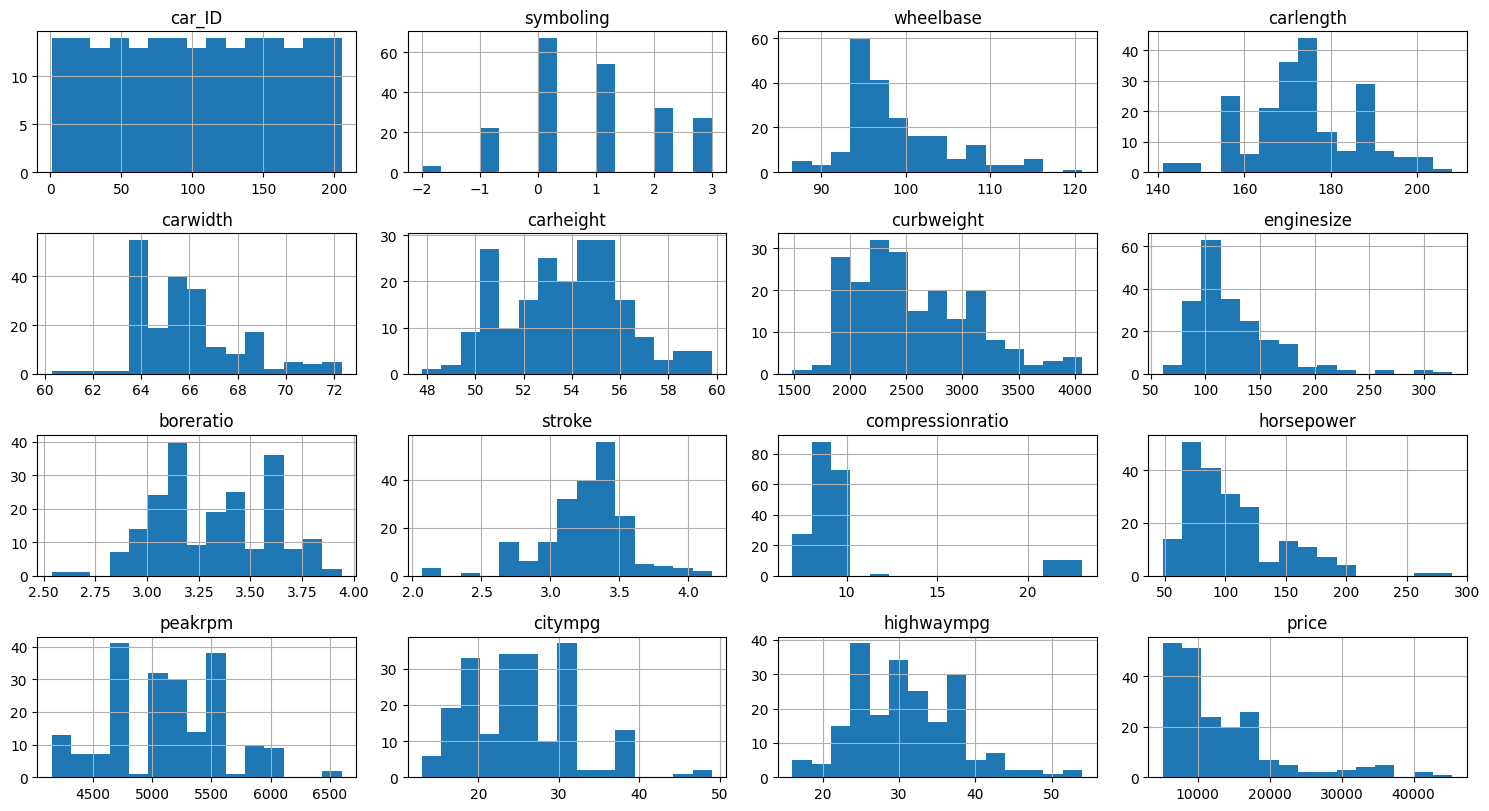

In [11]:
# Histograms for numerical columns
numerical_cols=df.select_dtypes(include=[float,int]).columns

df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

#### Positive skewness and outliers in columns enginesize, compressionratio, horsepower and price.

### **Box plot to find columns with outliers**

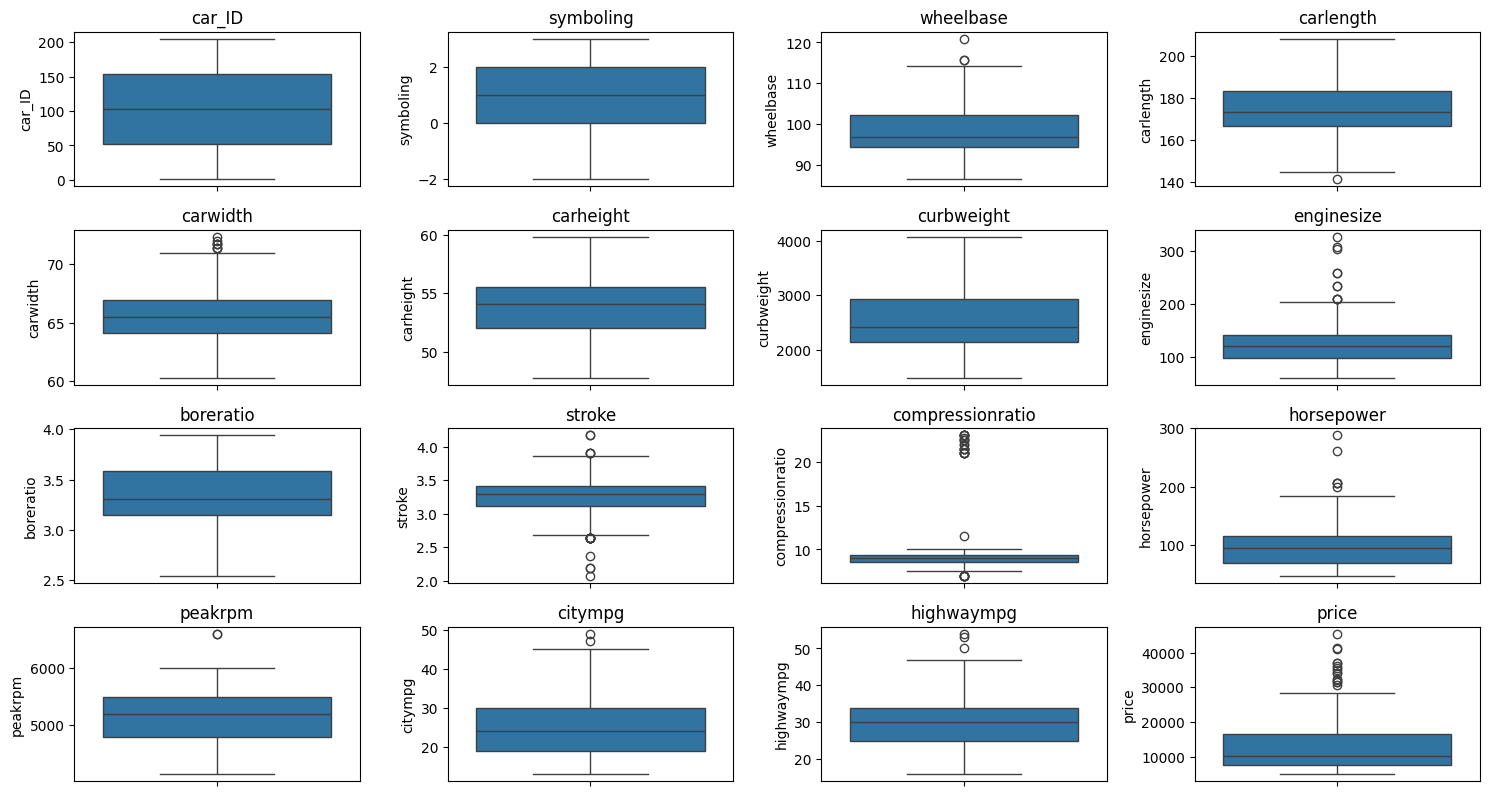

In [12]:
#box plot to identify outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
 plt.subplot(5, 4, i+1)
 sns.boxplot(y=df[col])
 plt.title(col)
plt.tight_layout()
plt.show()


#### Outliers are found in carwidth, enginesize, stroke, compressionratio, horsepowerhighwaympg and price.

### **Correlation with heatmap to interpret the relation and multicollinearity**

In [13]:
numerical_data=df.select_dtypes(include=[float,int])
corr_matrix = numerical_data.corr()

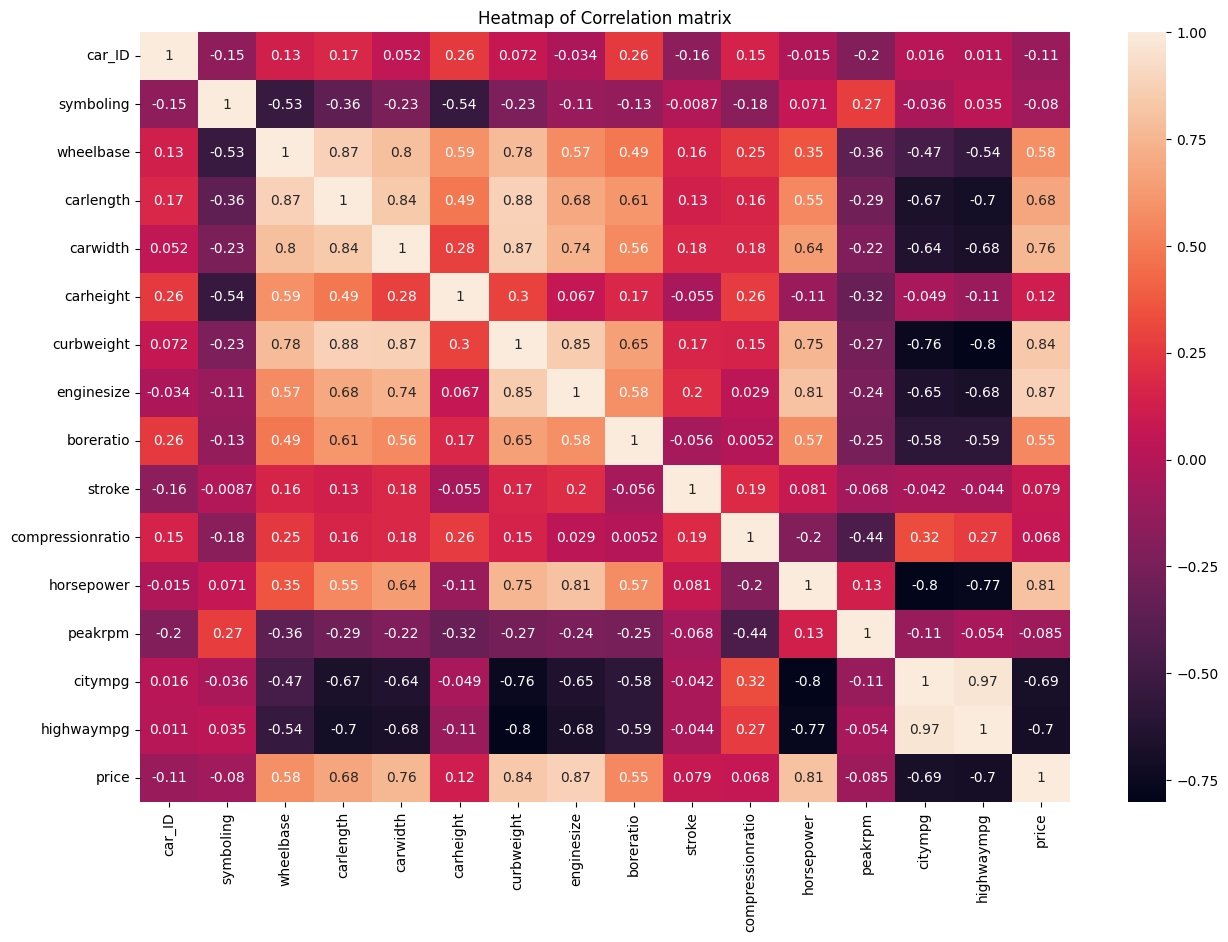

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Heatmap of Correlation matrix")
plt.show()

#### Columns which are highly correlated with target variable - price
 - highwaympg
 - citympg
 - horsepower
 - enginesize
 - curbweight
 - carwidth

#### Columns with multicollinearity
 - highwaympg and citympg
 - carlength and curbweight
 - carwidth and curbweight
 - wheelbase and carlength
 - enginesize and curbweight

<Axes: xlabel='enginesize', ylabel='curbweight'>

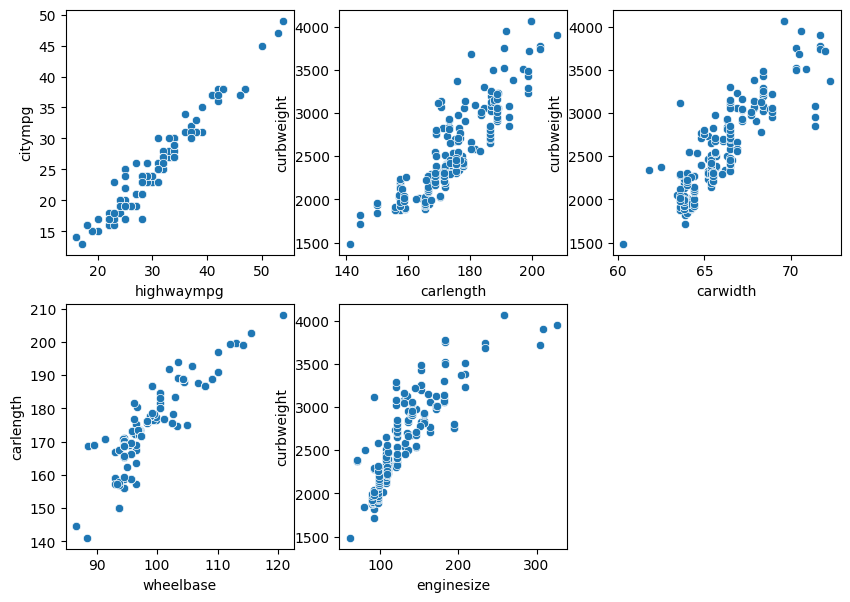

In [15]:
plt.figure(figsize=(10, 7))
plt.subplot(2,3,1)
sns.scatterplot(data=df,x='highwaympg',y='citympg')
plt.subplot(2,3,2)
sns.scatterplot(data=df,x='carlength',y='curbweight')
plt.subplot(2,3,3)
sns.scatterplot(data=df,x='carwidth',y='curbweight')
plt.subplot(2,3,4)
sns.scatterplot(data=df,x='wheelbase',y='carlength')
plt.subplot(2,3,5)
sns.scatterplot(data=df,x='enginesize',y='curbweight')

#### Drop columns which have multicollinearity
Columns which have multicollinearity are citympg, curbweight and wheelbase.

# <span style="color : green" > Data Preprocessing </span>

### Drop irrelevant and multicollinear columns

In [16]:
df1=df.copy()

In [17]:
df1.shape

(205, 26)

In [18]:
df1=df1.drop(columns=['car_ID'])

In [19]:
df1=df1.drop(columns=['citympg','curbweight','wheelbase'])
df1.shape

(205, 22)

### Handling Outliers

#### **IQR method is used for outlier treatment**


In [20]:
def whisker(col):
 q1,q3=np.percentile(col,[25,75])
 iqr=q3-q1
 lw=q1-1.5*iqr
 uw=q3+1.5*iqr
 return lw,uw

In [21]:
for i in df1.select_dtypes(include="number").columns:
 lw,uw=whisker(df1[i])
 df1[i]=np.where(df1[i]<lw,lw,df1[i])
 df1[i]=np.where(df1[i]>uw,uw,df1[i])

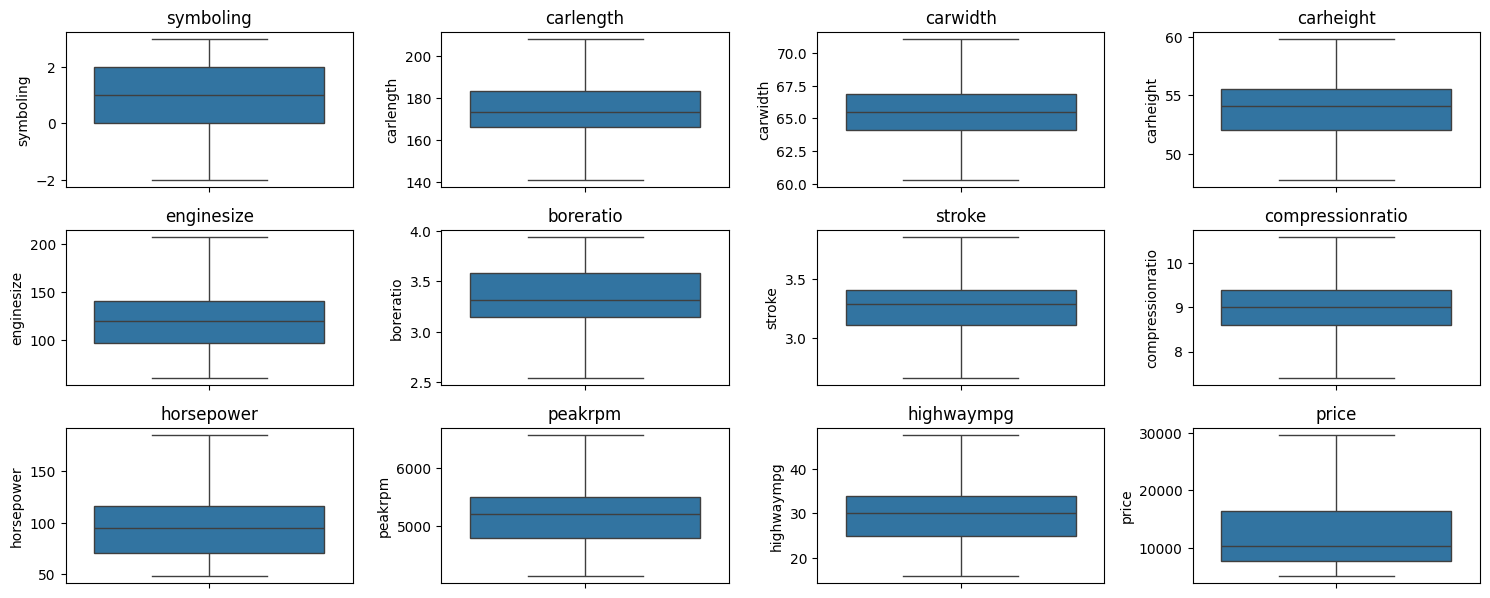

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#box plot to identify outliers
plt.figure(figsize=(15, 10))
numeric_columns = df1.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
 plt.subplot(5, 4, i+1)
 sns.boxplot(y=df1[col])
 plt.title(col)
plt.tight_layout()
plt.show()

#### All outliers are removed

# <span style="color : green" > Feature Engineering </span>

### Define feature variables and targetted variables

In [23]:
X=df1.drop('price', axis=1)
y=df1[['price']]

#### X is the feature variable and y is the targetted variable

### Identify categorical and numerical features

In [24]:
categorical_features=X.select_dtypes(include=['object']).columns
numerical_features=X.select_dtypes(include=['float64','int64']).columns

### **Encoding categorical features by using Label Encoding**

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df1:
    df1[i] = label_encoder.fit_transform(df1[i])

In [26]:
X=df1.drop('price', axis=1)
y=df1[['price']]

In [27]:
df1.shape

(205, 22)

In [28]:
X.shape

(205, 21)

In [29]:
y.shape

(205, 1)

In [30]:
X.dtypes

symboling           int64
CarName             int32
fueltype            int32
aspiration          int32
doornumber          int32
carbody             int32
drivewheel          int32
enginelocation      int32
carlength           int64
carwidth            int64
carheight           int64
enginetype          int32
cylindernumber      int32
enginesize          int64
fuelsystem          int32
boreratio           int64
stroke              int64
compressionratio    int64
horsepower          int64
peakrpm             int64
highwaympg          int64
dtype: object

#### All are in numerical form.

In [31]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg
0,5,2,1,0,1,0,2,0,22,8,...,0,2,18,5,23,1,13,30,10,10
1,5,3,1,0,1,0,2,0,22,8,...,0,2,18,5,23,1,13,30,10,10
2,3,1,1,0,1,2,2,0,29,16,...,5,3,28,5,1,25,13,45,10,9
3,4,4,1,0,0,3,1,0,45,21,...,3,2,11,5,13,22,22,27,16,13
4,4,5,1,0,0,3,0,0,45,23,...,3,1,22,5,13,22,5,33,16,5


### **Apply Standard scaling to the numerical features**

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Convert the result back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg
0,1.743470,-1.838221,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-0.652539,-0.913443,...,-2.865105,-0.147475,0.136214,0.869568,0.509085,-1.778342,-0.115961,0.353926,-0.286997,-0.559953
1,1.743470,-1.813780,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-0.652539,-0.913443,...,-2.865105,-0.147475,0.136214,0.869568,0.509085,-1.778342,-0.115961,0.353926,-0.286997,-0.559953
2,0.133509,-1.862662,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.320602,-0.169257,...,1.886890,1.112210,1.076413,0.869568,-1.698580,0.922103,-0.115961,1.354223,-0.286997,-0.728021
3,0.938490,-1.789339,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.438110,0.295859,...,-0.013908,-0.147475,-0.521925,0.869568,-0.494399,0.584548,1.291589,0.153867,0.870402,-0.055749
4,0.938490,-1.764897,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.438110,0.481906,...,-0.013908,-1.407161,0.512294,0.869568,-0.494399,0.584548,-1.367116,0.553985,0.870402,-1.400294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.510231,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.291662,1.505161,...,-0.013908,-0.147475,0.700334,0.869568,1.713265,-0.540638,0.978800,0.487299,0.677502,-0.391885
201,-1.476452,1.485790,0.328798,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.291662,1.412138,...,-0.013908,-0.147475,0.700334,0.869568,1.713265,-0.540638,-0.428750,1.554282,0.484602,-0.896089
202,-1.476452,1.534673,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.291662,1.505161,...,1.886890,1.112210,1.546513,0.869568,0.810130,-1.440786,-0.272355,0.887418,0.870402,-1.232226
203,-1.476452,1.583555,-3.041381,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.291662,1.505161,...,-0.013908,1.112210,0.794354,-0.126306,-1.196838,0.584548,1.604378,0.220553,-0.672797,-0.559953


# <span style="color : green" > Model Implementation </span>

### **Split data into training and testing sets**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg
66,2,60,0,0,0,3,2,0,40,20,...,3,2,21,3,21,30,24,11,1,21
111,2,85,1,0,0,3,2,0,60,32,...,2,2,15,5,22,0,8,23,10,7
153,2,121,1,0,0,4,1,0,26,4,...,3,2,6,1,8,6,13,6,8,19
96,3,76,1,0,0,3,1,0,14,5,...,3,2,7,1,11,19,18,9,12,19
38,2,41,1,0,1,2,1,0,20,14,...,3,2,12,0,11,29,13,18,19,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,70,1,0,1,2,2,0,51,29,...,5,3,34,5,21,18,13,48,12,8
14,3,15,1,0,0,3,2,0,64,26,...,3,3,31,5,16,14,13,36,2,8
92,3,76,1,0,0,3,1,0,14,5,...,3,2,7,1,11,19,18,9,12,19
179,5,120,1,0,1,2,2,0,57,28,...,0,3,32,5,15,20,16,49,12,7


### **Model Selection**

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []

models = [
LinearRegression(),
DecisionTreeRegressor(),
RandomForestRegressor(),
GradientBoostingRegressor(),
SVR()
]

for model in models :
    model.fit(X_train , y_train)
    prediction = model.predict(X_test)
    model_name.append(model.__class__.__name__)
    RMSE.append(mean_squared_error(y_test, prediction, squared=False))
    MSE.append(mean_squared_error(y_test, prediction))
    MAE.append(mean_absolute_error(y_test, prediction))
    R2_score.append(r2_score(y_test, prediction) * 100)

C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureW

In [38]:
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,14.488320,209.911406,11.551407,92.164382
RandomForestRegressor,14.846384,220.415128,11.750549,91.772297
LinearRegression,18.341313,336.403766,15.038935,87.442648
DecisionTreeRegressor,20.678727,427.609756,14.975610,84.038091
SVR,40.406545,1632.688849,33.613728,39.054640


#### **RandomForestRegressor has the best performance among all listed models.** 
Random Forest gives lowest RMSE(14.48), MSE(209.8), and MAE(11.5), and the highest R² score(92.16). It suggests that the Random Forest Regressor is able to capture the underlying patterns in the data very well.
Model which is performed least is SVM with lowest R2 square and highest RMSE, MSE and RAE.

# <span style="color : green" > Feature Selection </span>

### **SelectKBest**

In [39]:
from sklearn.feature_selection import SelectKBest, f_regression

# SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=10)
X_kbest = selector_kbest.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_kbest = selector_kbest.get_support(indices=True)

# Get the names of the selected features
selected_features_kbest = X_train.columns[selected_indices_kbest]
print("Selected features using SelectKBest:", selected_features_kbest)

Selected features using SelectKBest: Index(['aspiration', 'drivewheel', 'enginelocation', 'carlength', 'carwidth',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'highwaympg'],
      dtype='object')


C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Train the models with selected features using SelectKBest

In [40]:
X1 = X_scaled[['aspiration', 'drivewheel', 'enginelocation', 'carlength', 'carwidth',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'highwaympg']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
 LinearRegression(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 SVR()
]

for model in models :
 model.fit(X1_train , y1_train)

 prediction = model.predict(X1_test)

 model_name.append(model.__class__.__name__)

 RMSE.append(mean_squared_error(y1_test, prediction, squared=False))
 MSE.append(mean_squared_error(y1_test, prediction))
 MAE.append(mean_absolute_error(y1_test, prediction))
 R2_score.append(r2_score(y1_test, prediction) * 100)

models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureW

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,14.538840,211.377881,12.030775,92.109641
RandomForestRegressor,14.573923,212.399243,11.128681,92.071515
DecisionTreeRegressor,16.721246,279.600054,12.908943,89.563029
LinearRegression,18.575118,345.035007,15.267826,87.120459
SVR,33.803325,1142.664782,26.269417,57.346364


#### Selected features using SelectKBest are
['aspiration', 'drivewheel', 'enginelocation', 'carlength', 'carwidth',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'highwaympg']

#### Best model using SelectKBest is Gradient Boosting regressor

### **SelectFromModel with Lasso (L1 Regularization)**

In [41]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Lasso model
lasso_model = Lasso(alpha=0.1)

# SelectFromModel with Lasso
selector_lasso = SelectFromModel(lasso_model, max_features=10)
X_lasso = selector_lasso.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_lasso = selector_lasso.get_support(indices=True)

# Print selected feature names
selected_features_lasso = X_train.columns[selected_indices_lasso]
print("Selected features using SelectFromModel with Lasso:", selected_features_lasso)


Selected features using SelectFromModel with Lasso: Index(['symboling', 'fueltype', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'cylindernumber', 'fuelsystem', 'horsepower',
       'highwaympg'],
      dtype='object')


### Train the models with selected features using L1 Regularization

In [42]:
X2 = X_scaled[['symboling', 'fueltype', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'cylindernumber', 'fuelsystem', 'horsepower',
       'highwaympg']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size = 0.2,random_state = 42)
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
 LinearRegression(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 SVR()
]

for model in models :
 model.fit(X2_train , y2_train)

 prediction = model.predict(X2_test)

 model_name.append(model.__class__.__name__)

 RMSE.append(mean_squared_error(y2_test, prediction, squared=False))
 MSE.append(mean_squared_error(y2_test, prediction))
 MAE.append(mean_absolute_error(y2_test, prediction))
 R2_score.append(r2_score(y2_test, prediction) * 100)

models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureW

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
RandomForestRegressor,17.031699,290.078775,12.874296,89.171877
GradientBoostingRegressor,17.818110,317.485047,14.321561,88.148850
LinearRegression,19.159806,367.098180,15.691803,86.296880
DecisionTreeRegressor,22.232283,494.274390,16.329268,81.549619
SVR,39.880526,1590.456333,31.829507,40.631105


#### Selected variables using L1 Regularization are
['symboling', 'fueltype', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'cylindernumber', 'fuelsystem', 'horsepower',
       'highwaympg']

#### Best model with L1 regularisation is Random Forest Regressor.

### **3. Recursive Feature Elimination (RFE) with Random Forest Regressor**

In [43]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# RFE with Random Forest regressor
rfe_selector_regressor = RFE(estimator=rf_regressor, n_features_to_select=10, step=1)
X_rfe_regressor = rfe_selector_regressor.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_rfe_regressor = rfe_selector_regressor.get_support(indices=True)

# Get the names of the selected features
selected_features_rfe_regressor = X_train.columns[selected_indices_rfe_regressor]
print("Selected features using RFE with Random Forest Regressor:", selected_features_rfe_regressor)

C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConvers

Selected features using RFE with Random Forest Regressor: Index(['CarName', 'carbody', 'carlength', 'carwidth', 'carheight',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'highwaympg'],
      dtype='object')


### Train the models with selected features using Recursive Feature Elimination (RFE)

In [44]:
X3 = X_scaled[['CarName', 'carbody', 'carlength', 'carwidth', 'carheight',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'highwaympg']]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y,test_size = 0.2,random_state = 42)
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
 LinearRegression(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 SVR()
]
for model in models :
 model.fit(X3_train , y3_train)

 prediction = model.predict(X3_test)

 model_name.append(model.__class__.__name__)

 RMSE.append(mean_squared_error(y3_test, prediction, squared=False))
 MSE.append(mean_squared_error(y3_test, prediction))
 MAE.append(mean_absolute_error(y3_test, prediction))
 R2_score.append(r2_score(y3_test, prediction) * 100)
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureW

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
RandomForestRegressor,14.761192,217.892778,11.671398,91.866452
GradientBoostingRegressor,15.168719,230.090027,10.954961,91.411150
DecisionTreeRegressor,17.949794,322.195122,13.317073,87.973031
LinearRegression,19.927600,397.109259,15.960346,85.176620
SVR,36.998203,1368.867043,28.823241,48.902637


#### Selected features using Recursive Feature Elimination are
['CarName', 'carbody', 'carlength', 'carwidth', 'carheight',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'highwaympg']

#### Model that performed best using RFE is Random forest Regressor.

### **Feature selection using Variance Threshold**

In [45]:
from sklearn.feature_selection import VarianceThreshold

# Variance Threshold
variance_selector = VarianceThreshold(threshold=0.1)
X_variance = variance_selector.fit_transform(X_train)

# Get the selected feature indices
selected_indices_variance = [i for i, keep in enumerate(variance_selector.get_support()) if keep]

# Print selected feature names
selected_features_variance = X_train.iloc[:, selected_indices_variance].columns.tolist()
print("Selected features using Variance Threshold:", selected_features_variance)

Selected features using Variance Threshold: ['symboling', 'CarName', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'carlength', 'carwidth', 'carheight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'highwaympg']


### Train the models with selected features using Variance Threshold

In [46]:
X4 = X_scaled[['symboling', 'CarName', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'carlength', 'carwidth', 
               'carheight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 
               'compressionratio', 'horsepower', 'peakrpm', 'highwaympg']]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y,test_size = 0.2,random_state = 42)
model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []
models = [
 LinearRegression(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 SVR()
]
for model in models :
 model.fit(X4_train , y4_train)

 prediction = model.predict(X4_test)

 model_name.append(model.__class__.__name__)

 RMSE.append(mean_squared_error(y4_test, prediction, squared=False))
 MSE.append(mean_squared_error(y4_test, prediction))
 MAE.append(mean_absolute_error(y4_test, prediction))
 R2_score.append(r2_score(y4_test, prediction) * 100)
models_df = pd.DataFrame({"Model-Name":model_name, "RMSE": RMSE, "MSE":MSE, "MAE":MAE, "R2_Score":R2_score})
models_df = models_df.set_index('Model-Name')
models_df.sort_values("R2_Score", ascending = False)

C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureW

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,14.179327,201.053321,11.201665,92.495038
RandomForestRegressor,14.594887,213.010720,11.642581,92.048690
LinearRegression,19.086794,364.305710,15.147713,86.401118
DecisionTreeRegressor,19.642537,385.829268,14.219512,85.597682
SVR,40.437222,1635.168942,32.394929,38.962063


#### Significant variables using Variance Threshold are 
['symboling', 'CarName', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'carlength', 'carwidth', 
               'carheight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 
               'compressionratio', 'horsepower', 'peakrpm', 'highwaympg']

#### Using variance threshold, model performed model is Gradient Forest Regressor.

### **Finding the feature importance using Random forest**

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train , y_train)

# Extract feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Print feature importances
print("Feature Importances:")
for idx in sorted_indices:
 print(f"{X.columns[idx]}: {feature_importances[idx]}")

C:\Users\gokul\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature Importances:
highwaympg: 0.302408174382094
horsepower: 0.27039200008003345
fuelsystem: 0.10616187286497601
carlength: 0.0986017962243261
enginesize: 0.08596711313467903
carwidth: 0.05875615461838718
CarName: 0.018063457060366866
stroke: 0.009902291587839389
carheight: 0.009762593136816511
carbody: 0.00884909433520841
compressionratio: 0.008341271085807938
peakrpm: 0.0066333052863174246
boreratio: 0.0060790046033494085
drivewheel: 0.0033519188607593325
doornumber: 0.0018560957437698743
symboling: 0.001684695784336768
aspiration: 0.0012313284025039135
enginetype: 0.001011576072684732
fueltype: 0.0006020793988048832
cylindernumber: 0.00025747534132886004
enginelocation: 8.670199561008272e-05


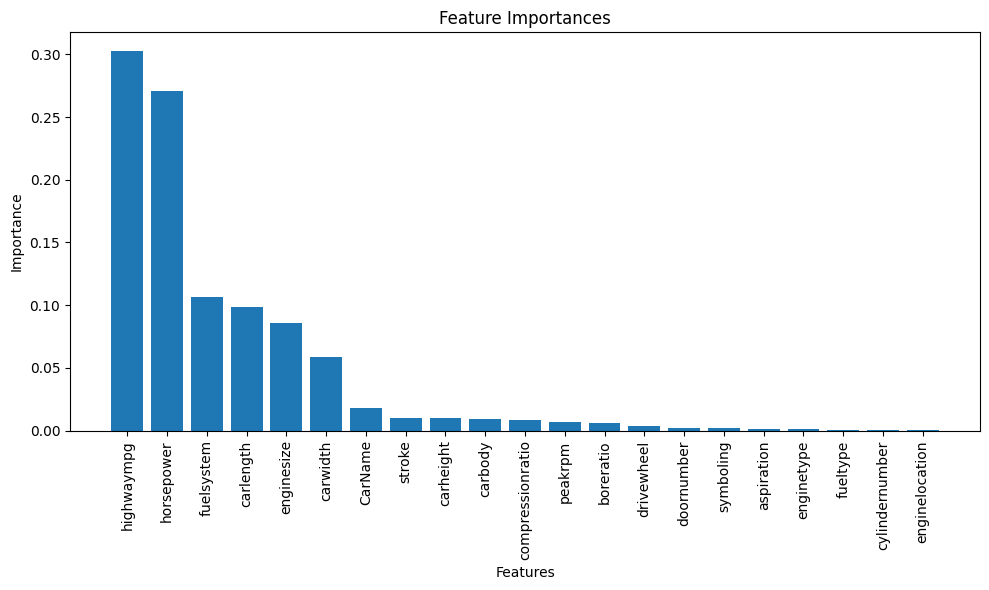

In [48]:
import matplotlib.pyplot as plt

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = [X.columns[idx] for idx in sorted_indices]
sorted_importances = [feature_importances[idx] for idx in sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

#### **Most significant variables affecting car price are highwaympg, horsepower, carlength, fuelsystem, enginesize, carwidth and so on.**

#### **Considering all the feature selection methods, best model is Random forest regressor and Gradient Boosting Regressor.**

# <span style="color : green" > Hyperparameter Tuning </span>

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grid = {
    'RandomForestRegressor': {
        'n_estimators': [100, 200, 300, 400, 500],
        'criterion': ['squared_error', 'absolute_error', 'poisson'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    
    'GradientBoostingRegressor': {
        'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'n_estimators': [100, 200, 300, 400, 500],
        'subsample': [0.6, 0.8, 1.0],
        'criterion': ['squared_error', 'friedman_mse'],
        'max_depth': [3, 5, 7, 9],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    
}

# Lists to store the results
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []

models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),

]

for model in models:
    model_class_name = model.__class__.__name__
    param_grid = param_grid[model_class_name]

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    prediction = best_model.predict(X_test)

    model_name.append(model_class_name)
    RMSE.append(mean_squared_error(y_test, prediction, squared=False))
    MSE.append(mean_squared_error(y_test, prediction))
    MAE.append(mean_absolute_error(y_test, prediction))
    R2_score.append(r2_score(y_test, prediction) * 100)

# Create a DataFrame with the results
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "RMSE": RMSE,
    "MSE": MSE,
    "MAE": MAE,
    "R2_Score": R2_score
})

models_df = models_df.set_index('Model-Name')
models_df = models_df.sort_values("R2_Score", ascending=False)
print(models_df)

#### After hyper parameter tuning, best model for the dataset is Random Forest Regressor.